In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [49]:
def create_dataset(X, slope = -3, intercept = 1, mu = 0, sigma = 1):
    '''
    Creates a noisy dataset with a linear relationship between X and y
    '''
    noise = np.random.normal(mu,sigma,len(X))
    return (slope*X + intercept) + noise

def draw_line(X, y, m, c):
    '''
    Draws the best fit line on a graph with data points
    '''
    X_max,X_min = np.max(X), np.min(X)

    X_plot = np.linspace(X_min,X_max,10)
    y_plot = m*X_plot+c

    plt.scatter(X,y)
    plt.plot(X_plot,y_plot,color = 'r')
    
def calculate_mse(X, y, m, c):
    '''
    Calculates the mean squared error for the predicted data
    '''
    predicted = m * X + c
    return np.mean((y-predicted)**2)
    

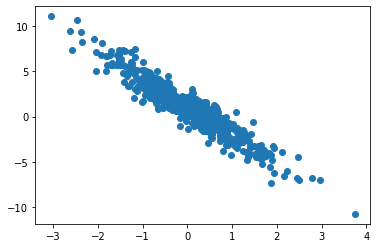

In [45]:
n = 500
X = np.random.randn(n)
y = create_dataset(X)
plt.scatter(X,y)

Now, since we already have the dataset ready we need to find the best fitting line that can estimate the data. 

The equation of a line is given by:
$$ y = mx + c $$

Hence, we need to find the best value for $m$ and $c$ (also known as parameters) such that it can fit data well.

We will the simple linear regression method to find the best values for the parameters.
$$ m = \dfrac{\Sigma x_i y_i - \dfrac{1}{n} \Sigma x_i \Sigma y_i}{\Sigma x_i^2 - \dfrac{1}{n}(\Sigma x_i)^2} = \dfrac{Cov[x,y]}{Var[x]} $$

For $c$
$$ c = \overline{y} - m\overline{x} $$
where
$$ \overline{y} = mean(y) \\ \overline{x} = mean(x)$$ 


In [46]:
numerator = np.sum(X*y) - (np.sum(X)*np.sum(y))/n
denominator = np.sum(X**2) - (np.sum(X)**2)/n
m = numerator/denominator
c = np.mean(y) - m*np.mean(X)
print ('m = {:.4f}'.format(m))
print ('c = {:.4f}'.format(c))

m = -3.0492
c = 1.0286


Now that we have the parameters for our line let's plot the line and see how well it fits the data.

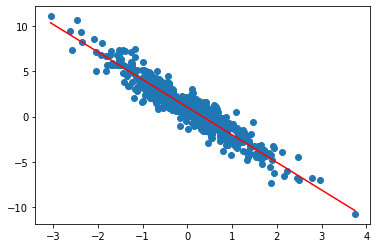

In [50]:
draw_line(X, y, m, c)

Visually the line fits well but we still need something concrete like a number of how good the parameters are hence we use the Mean squared error.

$$ MSE = \dfrac{\Sigma(y_i-\overline{y_i})^2}{n} $$

where

$$ y_i = \text{True $y$ value for the corresponding $i^{th}$ x value} \\ \overline{y_i} = \text{Predicted $y$ value for the corresponding $i^{th}$ x value} $$

In [51]:
mse = calculate_mse(X,y,m,c)
print ('Mean squared error {:.4f}'.format(mse))

Mean squared error 0.9664
